### Introdução à Programação de Computadores - 2020/2

# **Projeto Prático Final** 


Professores:

*   Jefersson Alex dos Santos - jefersson@dcc.ufmg.br
*   João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br

------------------

# Introdução
---------------
Neste projeto realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.




Tarefa 0 - Leitura dos dados
---------

**Essa está pronta! :-)**

Na célula abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também criamos um dicionário <code>reg</code> pra facilitar o acesso aos registros.



In [1]:
# Baixando os dados do site oficial (link alternativo abaixo)
#!wget https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv

# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    file = open(filename, 'r', encoding='ISO-8859-1')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("Cfem.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano de Referencia', 'Mes de Referencia', 'Processo', 'Ano do Processo', 'Tipo PF/PJ', 'CPF/CNPJ', 'Pessoa Física/Jurídica', 'Fase do Processo', 'Substância', 'Uf', 'Município', 'Unidade de Medida', 'Quantidade Comercializada', 'Valor Recolhido (CFEM)'] 

['2002', '6', '', '', 'PF', '***.000.000-**', 'Não Informado', '', '', '', '', '', '', '31']
Número total de registros: 1213733
{'Ano de Referencia': 0, 'Mes de Referencia': 1, 'Processo': 2, 'Ano do Processo': 3, 'Tipo PF/PJ': 4, 'CPF/CNPJ': 5, 'Pessoa Física/Jurídica': 6, 'Fase do Processo': 7, 'Substância': 8, 'Uf': 9, 'Município': 10, 'Unidade de Medida': 11, 'Quantidade Comercializada': 12, 'Valor Recolhido (CFEM)': 13}


Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



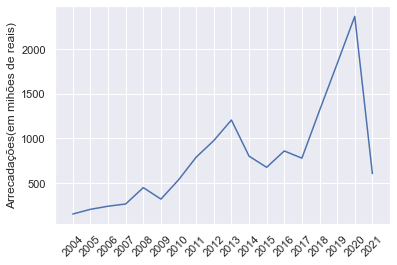

In [387]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dadosSelecionados = list()

for linha in dados:
    if(len(linha)) == 14:
        dadosSelecionados.append(linha)

nova_lista = list()

for linha in dadosSelecionados:
    if linha[9] == 'MG' and int(linha[0]) >= 2004:
        nova_lista.append(linha)
        
dadosCFEM = np.array(nova_lista)

d = dict()

for ano, arrecadacoes in dadosCFEM[:, (0, 13)]:
    if (int(ano) not in d):
        d[int(ano)] = float(arrecadacoes.replace(',', '.')) / 1000000
    else:
        d[int(ano)] = d[int(ano)] + float(arrecadacoes.replace(',', '.')) / 1000000
    

anos = list(d.keys())
arrecadacoes = list(d.values())

plt.plot(anos, arrecadacoes)
plt.xlim(2003, 2022)
plt.xticks(np.arange(2004, 2022, 1))

plt.xticks(rotation=45)
plt.ylabel('Arrecadações(em mihões de reais)')
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show()

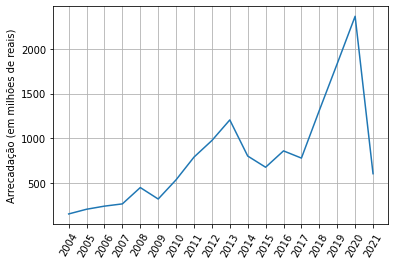

In [ ]:
# Implemente seu código aqui!


Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Implemente um código capaz de plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

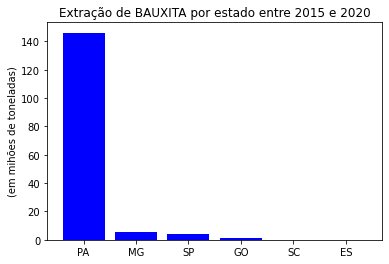

In [165]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

dadosSelecionados = list()

for linha in dados:
    if(len(linha)) == 14:
        dadosSelecionados.append(linha)

nova_lista = list()

somaSP = 0
somaMG = 0 
somaPA = 0
somaGO = 0
somaES = 0 
somaSC = 0

for linha in dadosSelecionados:
    linha[11].strip()  
    if linha[8] == 'BAUXITA' and int(linha[0]) >= 2015 and int(linha[0]) <= 2020 and (linha[11] != 'm3  '):
        nova_lista.append(linha)
        if(linha[9] == 'SP'):
            if(linha[11] == 't  '):
                somaSP += float(linha[12].replace(",", ".")) / 1000000
            if(linha[11] == 'kg  '):
                somaSP += float(linha[12].replace(",", ".")) / 1000000000
        if(linha[9] == 'MG'):
            if(linha[11] == 't  '):
                somaMG += float(linha[12].replace(",", ".")) / 1000000
            if(linha[11] == 'kg  '):
                somaMG += float(linha[12].replace(",", ".")) / 1000000000
        if(linha[9] == 'SC'):
            if(linha[11] == 't  '):
                somaSC += float(linha[12].replace(",", ".")) / 1000000
            if(linha[11] == 'kg  '):
                somaSC += float(linha[12].replace(",", ".")) / 1000000000
        if(linha[9] == 'GO'):
            if(linha[11] == 't  '):
                somaGO += float(linha[12].replace(",", ".")) / 1000000
            if(linha[11] == 'kg  '):
                somaGO += float(linha[12].replace(",", ".")) / 1000000000
        if(linha[9] == 'ES'):
            if(linha[11] == 't  '):
                somaES += float(linha[12].replace(",", ".")) / 1000000
            if(linha[11] == 'kg  '):
                somaES += float(linha[12].replace(",", ".")) / 1000000000
        if(linha[9] == 'PA'):
            if(linha[11] == 't  '):
                somaPA += float(linha[12].replace(",", ".")) / 1000000
            if(linha[11] == 'kg  '):
                somaPA += float(linha[12].replace(",", ".")) / 1000000000


d1 = {'SP': somaSP, 'MG': somaMG, 'PA': somaPA, 'ES': somaES, 'GO':somaGO, 'SC':somaSC}

#print("SP: %.2f - MG: %.2f - PA: %.2f - ES: %.2f - GO %.2f - SC %.2f" % (somaSP, somaMG, somaPA, somaES, somaGO, somaSC))

estados = list(d1.keys())
quantidade = list(d1.values())

df = pd.DataFrame({"Estados": estados, "Quantidade": quantidade})
df_sorted = df.sort_values("Quantidade", ascending=False)

plt.bar('Estados', 'Quantidade', data=df_sorted, color='blue')


plt.ylabel('(em mihões de toneladas)')
plt.title("Extração de BAUXITA por estado entre 2015 e 2020")
#plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show()

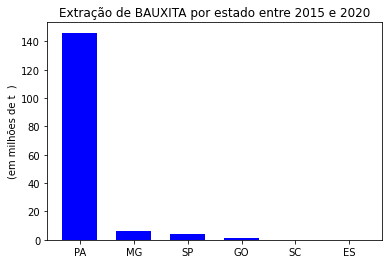

In [ ]:
# Implemente seu código aqui!


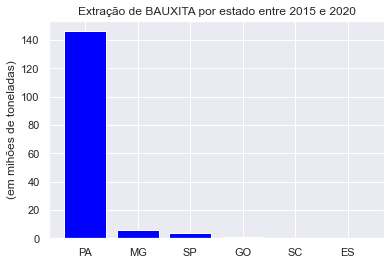

In [373]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

dadosSelecionados = list()

for linha in dados:
    if(len(linha)) == 14:
        dadosSelecionados.append(linha)

nova_lista = list()

for linha in dadosSelecionados:
    linha[11].strip()  
    if linha[8] == 'BAUXITA' and int(linha[0]) >= 2015 and int(linha[0]) <= 2020 and (linha[11] != 'm3 '):
        nova_lista.append(linha)

dadosCFEM = np.array(nova_lista)

d1 = defaultdict(lambda: 0)

for estado, unidade, quantidade in dadosCFEM[:, (9, 11, 12)]:
    if(unidade == 't  ') and (quantidade != ''):
        d1[estado] += float(quantidade.replace(",", ".")) / 1000000
        
    if(unidade == 'kg ') and (quantidade != ''):
        d1[estado] += float(quantidade.replace(",", ".")) / 1000000000

    if(unidade == 'm3 '): 
        continue


estados = list(d1.keys())
quantidade = list(d1.values())

df = pd.DataFrame({"Estados": estados, "Quantidade": quantidade})
df_sorted = df.sort_values("Quantidade", ascending=False)

plt.bar('Estados', 'Quantidade', data=df_sorted, color='blue')


plt.ylabel('(em mihões de toneladas)')
plt.title("Extração de BAUXITA por estado entre 2015 e 2020")
#plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show()

Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Implemente códigos para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.
Sugestão: utilize funções implementadas nas tarefas anteriores.

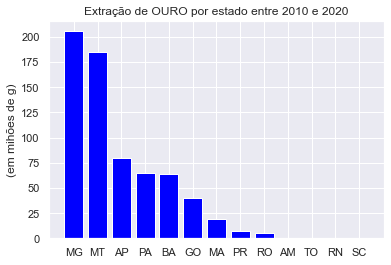

In [382]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

dadosSelecionados = list()

for linha in dados:
    if(len(linha)) == 14:
        dadosSelecionados.append(linha)

nova_lista = list()

d = defaultdict(lambda: 0)

for linha in dadosSelecionados:
    if linha[8] == 'OURO' and int(linha[0]) >= 2010 and int(linha[0]) <= 2020 and linha[9] != '':
        nova_lista.append(linha)

dadosCFEM = np.array(nova_lista)

d = defaultdict(lambda: 0)

for estado, unidade, quantidade in dadosCFEM[:, (9, 11, 12)]:
    if(unidade == 'g  ') and (quantidade != ''):
        d[estado] += float(quantidade.replace(",", ".")) / 1000000
        
    if(unidade == 'kg ') and (quantidade != ''):
        d[estado] += float(quantidade.replace(",", ".")) / 1000000000

    # elif(quantidade != ''):
    #     d[estado] += float(quantidade.replace(",", ".")) / 1000000

estados = list(d.keys())
quantidade = list(d.values())

df = pd.DataFrame({"Estados": estados, "Quantidade": quantidade})
df_sorted = df.sort_values("Quantidade", ascending=False)

plt.bar('Estados', 'Quantidade', data=df_sorted, color='blue')


plt.ylabel('(em mihões de g)')
plt.title("Extração de OURO por estado entre 2010 e 2020")
#plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show()

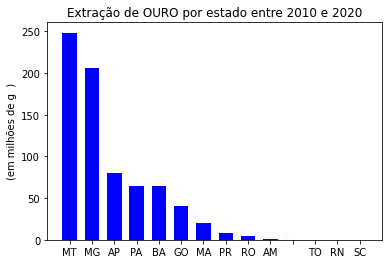

In [ ]:
# Faça seu código da Tarefa 3 aqui



Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Implemente códigos para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019). Sugestão: copie e altere as funções implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

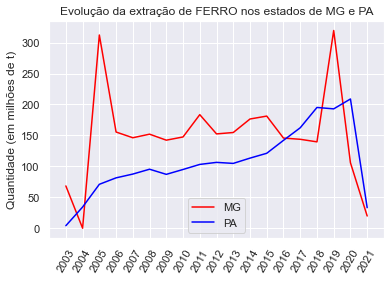

In [384]:
import numpy as numpy
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict

nova_listaMG = list()
nova_listaPA = list()

for linha in dadosSelecionados:
    if(linha[8] == 'FERRO') and (linha[9] == 'MG') and (int(linha[0]) >= 2003) and (int(linha[0]) <= 2021):
        nova_listaMG.append(linha)
    if(linha[8] == 'FERRO') and (linha[9] == 'PA') and (int(linha[0]) >= 2003) and (int(linha[0]) <= 2021):
        nova_listaPA.append(linha)

dadosCompletosFERRO_MG = np.array(nova_listaMG)
dadosCompletosFERRO_PA = np.array(nova_listaPA)

dadosMG = defaultdict(lambda: 0)
dadosPA = defaultdict(lambda: 0)

for ano,unidade, quantidade in dadosCompletosFERRO_MG[:, (0, 11, 12)]:
    if(unidade == 't  ') and (quantidade != ''):
        dadosMG[int(ano)] += float(quantidade.replace(",", ".")) / 1000000

    if(unidade == 'kg ') and (quantidade != ''):
        dadosMG[int(ano)] += float(quantidade.replace(",", ".")) / 1000000000

for ano,unidade, quantidade in dadosCompletosFERRO_PA[:, (0, 11, 12)]:
    if(unidade == 't  ') and (quantidade != ''):
        dadosPA[int(ano)] += float(quantidade.replace(",", ".")) / 1000000

    if(unidade == 'kg ') and (quantidade != ''):
        dadosPA[int(ano)] += float(quantidade.replace(",", ".")) / 1000000000


plt.plot(dadosMG.keys(), dadosMG.values(), color='red', label='MG')
plt.plot(dadosPA.keys(), dadosPA.values(), color='blue', label='PA')

plt.xlim(2002, 2022)
plt.xticks(np.arange(2003, 2022, 1))

plt.xticks(rotation=60)

plt.title("Evolução da extração de FERRO nos estados de MG e PA")

plt.ylabel("Quantidade (em milhões de t)")
plt.legend()
plt.show()

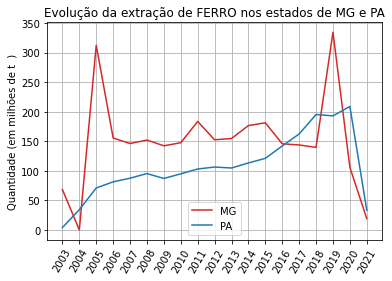

In [ ]:
# Faça seu código da Tarefa 4 aqui



Tarefa 5 - Percentual de arrecadação dos Estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Implemente um código para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.

Sugestão 1: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")

Sugestão 2: por questão de visualização, mostre apenas os  minérios mais frequentes e agrupe os menos frequentes em uma categoria "Outros". Seja criativo, as regras para agrupamento ficam a seu critério. =)


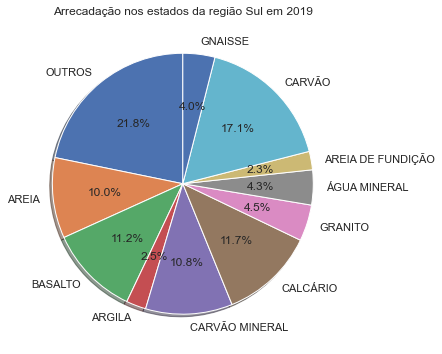

In [429]:
import numpy as numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

nova_lista = list()

for linha in dadosSelecionados:
    if linha[9] == 'PR' or linha[9] == 'SC' or linha[9] == 'RS' and int(linha[0]) == 2019:
        nova_lista.append(linha)

dadosDosul = np.array(nova_lista)

d = defaultdict(lambda: 0)

arrecadacaoTotal = 0

for minerio, arrecadacoes in dadosDosul[:, (8, 13)]:
    arrecadacaoTotal += float(arrecadacoes.replace(",", "."))

    if(minerio != ''):
        try:
            d[minerio] += float(arrecadacoes.replace(",", "."))
        except ValueError:
            pass

d2 = defaultdict(lambda: 0)

for minerio, arrecadacoes in d.items():
    outros = 'OUTROS'
    fracao = ((arrecadacoes / arrecadacaoTotal) * 100)

    if(fracao >= 2):
        d2[minerio] = fracao
    else:
        d2[outros] += fracao


minerios = list(d2.keys())
percentuais = list(d2.values())

# OPÇÃO 1
# fig, ax1 = plt.subplots()
# ax1.pie(percentuais, labels=minerios, autopct='%1.1f%%', shadow=True, startangle=90)
# ax1.axis('equal')
# plt.show()

# df = pd.DataFrame({"Minerios": minerios, "Percentuais": percentuais})
# df_sorted = df.sort_values("Percentuais", ascending=True)


# OPÇÃO 2
plt.pie(percentuais, labels=minerios, counterclock=True,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Arrecadação nos estados da região Sul em 2019")
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

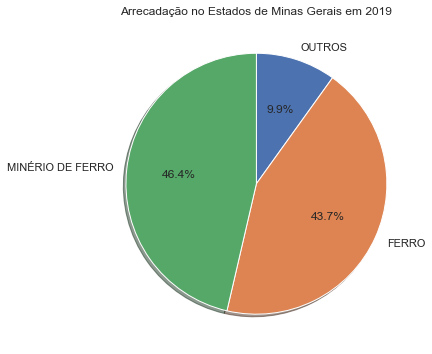

In [422]:
import numpy as numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

nova_lista = list()

for linha in dadosSelecionados:
    if linha[9] == 'MG' and int(linha[0]) == 2019:
        nova_lista.append(linha)

dadosMG = np.array(nova_lista)

d = defaultdict(lambda: 0)

arrecadacaoTotal = 0

for minerio, arrecadacoes in dadosMG[:, (8, 13)]:
    arrecadacaoTotal += float(arrecadacoes.replace(",", "."))

    if(minerio != ''):
        try:
            d[minerio] += float(arrecadacoes.replace(",", "."))
        except ValueError:
            pass

d2 = defaultdict(lambda: 0)

for minerio, arrecadacoes in d.items():
    outros = 'OUTROS'
    fracao = ((arrecadacoes / arrecadacaoTotal) * 100)

    if(fracao >= 5):
        d2[minerio] = fracao
    else:
        d2[outros] += fracao

minerios = list(d2.keys())
percentuais = list(d2.values())

fig, ax = plt.subplots()

# df = pd.DataFrame({"Minerios": minerios, "Percentuais": percentuais})
# df_sorted = df.sort_values("Percentuais", ascending=True)

plt.pie(percentuais, labels=minerios, counterclock=False,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Arrecadação no Estados de Minas Gerais em 2019")
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

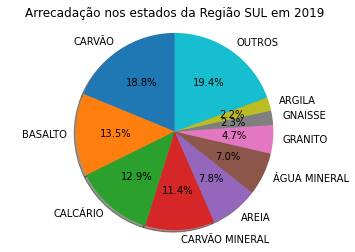

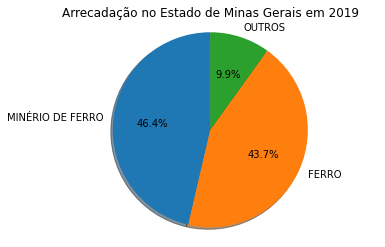

In [ ]:
# Faça seu código da Tarefa 5 aqui


